In [1]:
##Test from customize image
## importing classes from the file that is located in the different folder
from tensorflow.keras import backend as k
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import save_img
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
import imutils 
from imutils import paths
from keras.optimizers import Adam
import pickle
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd
import sys
import os

Using TensorFlow backend.


In [2]:
import pickle
H1 = pickle.loads(open('NewNet1/History/HistoryNewNet1_V1.pickle', "rb").read())
H2 = pickle.loads(open('NewNet2/History/HistoryNewNet2_V1.pickle', "rb").read())
H3 = pickle.loads(open('NewNet3/History/HistoryNewNet3_V1.pickle', "rb").read())
H4 = pickle.loads(open('NewNet4/History/HistoryNewNet4_V1.pickle', "rb").read())
H5 = pickle.loads(open('NewNet5/History/HistoryNewNet5_V1.pickle', "rb").read())
H6 = pickle.loads(open('NewNet6/History/HistoryNewNet6_V1.pickle', "rb").read())
H7 = pickle.loads(open('NewNet7/History/HistoryNewNet7_V1.pickle', "rb").read())
H8 = pickle.loads(open('NewNet8/History/HistoryNewNet8_V1.pickle', "rb").read())
H9 = pickle.loads(open('NewNet9/History/HistoryNewNet9_V1.pickle', "rb").read())
H10 = pickle.loads(open('NewNet10/History/HistoryNewNet10_V1.pickle', "rb").read())
H11 = pickle.loads(open('ownnet/History/HistoryOwnNet_V1.pickle', "rb").read())
H12 = pickle.loads(open('MiniVgg/History/Historyminivgg_V1.pickle', "rb").read())

[INFO] Showing Model Trainning and Testing Accuracy...


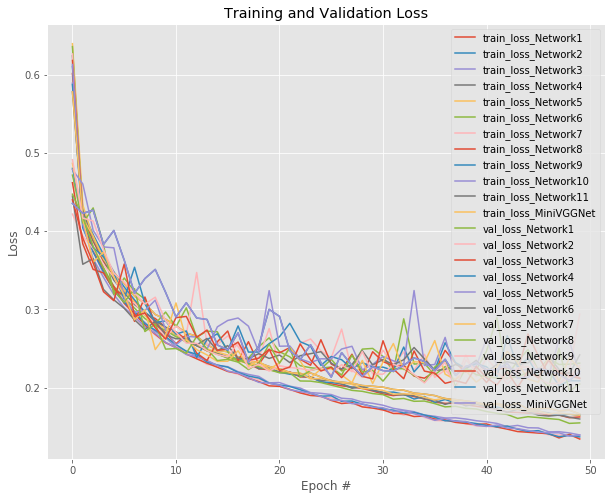

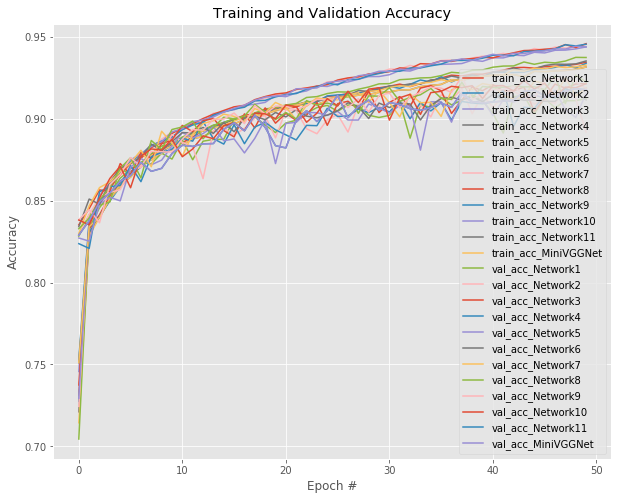

In [3]:
import matplotlib.pyplot as plt
# save the multi-label binarizer to disk
print("[INFO] Showing Model Trainning and Testing Accuracy...")
#f = open(args["labelbin"], "wb")
#f = open("mlb.pickle", "wb")
#f.write(pickle.dumps(mlb))
#f.close()

num_epochs = 50
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(10,8))
N = num_epochs
plt.plot(np.arange(0, N), H1["loss"], label="train_loss_Network1")
plt.plot(np.arange(0, N), H2["loss"], label="train_loss_Network2")
plt.plot(np.arange(0, N), H3["loss"], label="train_loss_Network3")
plt.plot(np.arange(0, N), H4["loss"], label="train_loss_Network4")
plt.plot(np.arange(0, N), H5["loss"], label="train_loss_Network5")
plt.plot(np.arange(0, N), H6["loss"], label="train_loss_Network6")
plt.plot(np.arange(0, N), H7["loss"], label="train_loss_Network7")
plt.plot(np.arange(0, N), H8["loss"], label="train_loss_Network8")
plt.plot(np.arange(0, N), H9["loss"], label="train_loss_Network9")
plt.plot(np.arange(0, N), H10["loss"], label="train_loss_Network10")
plt.plot(np.arange(0, N), H11["loss"], label="train_loss_Network11")
plt.plot(np.arange(0, N), H11["loss"], label="train_loss_MiniVGGNet")
plt.plot(np.arange(0, N),H1["val_loss"],label="val_loss_Network1")
plt.plot(np.arange(0, N),H2["val_loss"],label="val_loss_Network2") 
plt.plot(np.arange(0, N),H3["val_loss"],label="val_loss_Network3")
plt.plot(np.arange(0, N),H4["val_loss"],label="val_loss_Network4")
plt.plot(np.arange(0, N),H5["val_loss"],label="val_loss_Network5")
plt.plot(np.arange(0, N),H6["val_loss"],label="val_loss_Network6")
plt.plot(np.arange(0, N),H7["val_loss"],label="val_loss_Network7")
plt.plot(np.arange(0, N),H8["val_loss"],label="val_loss_Network8")
plt.plot(np.arange(0, N),H9["val_loss"],label="val_loss_Network9")
plt.plot(np.arange(0, N),H10["val_loss"],label="val_loss_Network10")
plt.plot(np.arange(0, N),H11["val_loss"], label="val_loss_Network11")
plt.plot(np.arange(0, N),H11["val_loss"], label="val_loss_MiniVGGNet")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right") #upper left

plt.savefig("Reports/"+"plot-LOSS")
plt.savefig("plot-LOSS")


plt.figure(figsize=(10,8))
plt.plot(np.arange(0, N), H1["acc"], label="train_acc_Network1")
plt.plot(np.arange(0, N), H2["acc"], label="train_acc_Network2")
plt.plot(np.arange(0, N), H3["acc"], label="train_acc_Network3")
plt.plot(np.arange(0, N), H4["acc"], label="train_acc_Network4")
plt.plot(np.arange(0, N), H5["acc"], label="train_acc_Network5")
plt.plot(np.arange(0, N), H6["acc"], label="train_acc_Network6")
plt.plot(np.arange(0, N), H7["acc"], label="train_acc_Network7")
plt.plot(np.arange(0, N), H8["acc"], label="train_acc_Network8")
plt.plot(np.arange(0, N), H9["acc"], label="train_acc_Network9")
plt.plot(np.arange(0, N), H10["acc"], label="train_acc_Network10")
plt.plot(np.arange(0, N), H11["acc"], label="train_acc_Network11")
plt.plot(np.arange(0, N), H11["acc"], label="train_acc_MiniVGGNet")
plt.plot(np.arange(0, N), H1["val_acc"], label="val_acc_Network1")
plt.plot(np.arange(0, N), H2["val_acc"], label="val_acc_Network2")
plt.plot(np.arange(0, N), H3["val_acc"], label="val_acc_Network3")
plt.plot(np.arange(0, N), H4["val_acc"], label="val_acc_Network4")
plt.plot(np.arange(0, N), H5["val_acc"], label="val_acc_Network5")
plt.plot(np.arange(0, N), H6["val_acc"], label="val_acc_Network6")
plt.plot(np.arange(0, N), H7["val_acc"], label="val_acc_Network7")
plt.plot(np.arange(0, N), H8["val_acc"], label="val_acc_Network8")
plt.plot(np.arange(0, N), H9["val_acc"], label="val_acc_Network9")
plt.plot(np.arange(0, N), H10["val_acc"], label="val_acc_Network10")
plt.plot(np.arange(0, N), H11["val_acc"], label="val_acc_Network11")
plt.plot(np.arange(0, N), H11["val_acc"], label="val_acc_MiniVGGNet")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower right") # upper

plt.savefig("Reports/"+"plot-ACCURACY")
plt.savefig("plot-ACCURACY")
